Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Now, we will read the telecom dataset. 
Please replace the filepath with the actual local filepath

In [3]:
filepath = r'C:\Users\Admin\Downloads\telecom_churn_data.csv'
tc_main = pd.read_csv(filepath)
tc_main.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
tc_main.shape

(99999, 226)

### Data Cleaning:

In [5]:
# Lets check the percentage of null values in each column of the dataset
def checkMissingValuesPercent():
    for column in tc_main.columns:        
        print(column,':',round(tc_main[column].isna().sum()*100/len(tc_main[column]),2))

In [6]:
checkMissingValuesPercent()

mobile_number : 0.0
circle_id : 0.0
loc_og_t2o_mou : 1.02
std_og_t2o_mou : 1.02
loc_ic_t2o_mou : 1.02
last_date_of_month_6 : 0.0
last_date_of_month_7 : 0.6
last_date_of_month_8 : 1.1
last_date_of_month_9 : 1.66
arpu_6 : 0.0
arpu_7 : 0.0
arpu_8 : 0.0
arpu_9 : 0.0
onnet_mou_6 : 3.94
onnet_mou_7 : 3.86
onnet_mou_8 : 5.38
onnet_mou_9 : 7.75
offnet_mou_6 : 3.94
offnet_mou_7 : 3.86
offnet_mou_8 : 5.38
offnet_mou_9 : 7.75
roam_ic_mou_6 : 3.94
roam_ic_mou_7 : 3.86
roam_ic_mou_8 : 5.38
roam_ic_mou_9 : 7.75
roam_og_mou_6 : 3.94
roam_og_mou_7 : 3.86
roam_og_mou_8 : 5.38
roam_og_mou_9 : 7.75
loc_og_t2t_mou_6 : 3.94
loc_og_t2t_mou_7 : 3.86
loc_og_t2t_mou_8 : 5.38
loc_og_t2t_mou_9 : 7.75
loc_og_t2m_mou_6 : 3.94
loc_og_t2m_mou_7 : 3.86
loc_og_t2m_mou_8 : 5.38
loc_og_t2m_mou_9 : 7.75
loc_og_t2f_mou_6 : 3.94
loc_og_t2f_mou_7 : 3.86
loc_og_t2f_mou_8 : 5.38
loc_og_t2f_mou_9 : 7.75
loc_og_t2c_mou_6 : 3.94
loc_og_t2c_mou_7 : 3.86
loc_og_t2c_mou_8 : 5.38
loc_og_t2c_mou_9 : 7.75
loc_og_mou_6 : 3.94
loc_og_mo

From the above result, we can see that there are some fields with more than 70% missing values, some of them are date fields. Initially, we will drop all the date columns from the dataset since it doesn't serve any purpose as we are looking at the records from monthly view.

In [7]:
date_column_list = []
for column in tc_main.columns:
    if "date" in column:
        date_column_list.append(column)
tc_main.drop(columns=date_column_list,inplace=True)

In [8]:
#Lets check the shape of the dataset after the deletion of columns
tc_main.shape

(99999, 214)

Next, we will investigate over other fields for which missing values are more than 70%

Fields like total_rech_data_*, max_rech_data_*, arpu_3g_*, arpu_2g_* have huge % of missing values. Also, they provide 
repetitive information which can be derived from count and average recharge. So, we will drop these columns.

In [9]:
col_to_be_deleted = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7',
                    'max_rech_data_8','max_rech_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']
tc_main.drop(columns=col_to_be_deleted,inplace=True)

In [10]:
tc_main.shape

(99999, 198)

For the fields which track Minutes of Usage (MOU), it is better to impute missing values with 0 so that it tallies with the 
value in the aggregated field. 
For eg, value in og_mou_* fields should tally with total_og_mou value for the corresponding month.
So, I am imputing missing values in all MOU fields with 0.

In [11]:
for column in tc_main.columns:
    if "mou" in column:
        tc_main[column] = tc_main[column].fillna(0)

In [12]:
#Lets check percentage of missing values again
checkMissingValuesPercent()

mobile_number : 0.0
circle_id : 0.0
loc_og_t2o_mou : 0.0
std_og_t2o_mou : 0.0
loc_ic_t2o_mou : 0.0
arpu_6 : 0.0
arpu_7 : 0.0
arpu_8 : 0.0
arpu_9 : 0.0
onnet_mou_6 : 0.0
onnet_mou_7 : 0.0
onnet_mou_8 : 0.0
onnet_mou_9 : 0.0
offnet_mou_6 : 0.0
offnet_mou_7 : 0.0
offnet_mou_8 : 0.0
offnet_mou_9 : 0.0
roam_ic_mou_6 : 0.0
roam_ic_mou_7 : 0.0
roam_ic_mou_8 : 0.0
roam_ic_mou_9 : 0.0
roam_og_mou_6 : 0.0
roam_og_mou_7 : 0.0
roam_og_mou_8 : 0.0
roam_og_mou_9 : 0.0
loc_og_t2t_mou_6 : 0.0
loc_og_t2t_mou_7 : 0.0
loc_og_t2t_mou_8 : 0.0
loc_og_t2t_mou_9 : 0.0
loc_og_t2m_mou_6 : 0.0
loc_og_t2m_mou_7 : 0.0
loc_og_t2m_mou_8 : 0.0
loc_og_t2m_mou_9 : 0.0
loc_og_t2f_mou_6 : 0.0
loc_og_t2f_mou_7 : 0.0
loc_og_t2f_mou_8 : 0.0
loc_og_t2f_mou_9 : 0.0
loc_og_t2c_mou_6 : 0.0
loc_og_t2c_mou_7 : 0.0
loc_og_t2c_mou_8 : 0.0
loc_og_t2c_mou_9 : 0.0
loc_og_mou_6 : 0.0
loc_og_mou_7 : 0.0
loc_og_mou_8 : 0.0
loc_og_mou_9 : 0.0
std_og_t2t_mou_6 : 0.0
std_og_t2t_mou_7 : 0.0
std_og_t2t_mou_8 : 0.0
std_og_t2t_mou_9 : 0.0
std_o

The same reasoning is applicable for og_others_*, ic_others_*, count_rech_2g_*, count_rech_3g_*, av_rech_amt_data_*.
So, we will impute 0 for the missing values.
Also, night_pck_user_* and fb_user_* are fields which are yes/no indicating whether they use the service or not.
So, we will impute 0 for missing values indicating they don't use.

In [13]:
columns_impute_zero = ['og_others_6','og_others_7','og_others_8','og_others_9','ic_others_6','ic_others_7','ic_others_8','ic_others_9',
                       'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7',
                      'count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
                      'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
for column in columns_impute_zero:    
        tc_main[column] = tc_main[column].fillna(0)

In [14]:
checkMissingValuesPercent()

mobile_number : 0.0
circle_id : 0.0
loc_og_t2o_mou : 0.0
std_og_t2o_mou : 0.0
loc_ic_t2o_mou : 0.0
arpu_6 : 0.0
arpu_7 : 0.0
arpu_8 : 0.0
arpu_9 : 0.0
onnet_mou_6 : 0.0
onnet_mou_7 : 0.0
onnet_mou_8 : 0.0
onnet_mou_9 : 0.0
offnet_mou_6 : 0.0
offnet_mou_7 : 0.0
offnet_mou_8 : 0.0
offnet_mou_9 : 0.0
roam_ic_mou_6 : 0.0
roam_ic_mou_7 : 0.0
roam_ic_mou_8 : 0.0
roam_ic_mou_9 : 0.0
roam_og_mou_6 : 0.0
roam_og_mou_7 : 0.0
roam_og_mou_8 : 0.0
roam_og_mou_9 : 0.0
loc_og_t2t_mou_6 : 0.0
loc_og_t2t_mou_7 : 0.0
loc_og_t2t_mou_8 : 0.0
loc_og_t2t_mou_9 : 0.0
loc_og_t2m_mou_6 : 0.0
loc_og_t2m_mou_7 : 0.0
loc_og_t2m_mou_8 : 0.0
loc_og_t2m_mou_9 : 0.0
loc_og_t2f_mou_6 : 0.0
loc_og_t2f_mou_7 : 0.0
loc_og_t2f_mou_8 : 0.0
loc_og_t2f_mou_9 : 0.0
loc_og_t2c_mou_6 : 0.0
loc_og_t2c_mou_7 : 0.0
loc_og_t2c_mou_8 : 0.0
loc_og_t2c_mou_9 : 0.0
loc_og_mou_6 : 0.0
loc_og_mou_7 : 0.0
loc_og_mou_8 : 0.0
loc_og_mou_9 : 0.0
std_og_t2t_mou_6 : 0.0
std_og_t2t_mou_7 : 0.0
std_og_t2t_mou_8 : 0.0
std_og_t2t_mou_9 : 0.0
std_o

So, all the missing values are treated.

#### Derive new features:

From the above field set, we can see that there is no field available indicating the total recahrge amount for data. However, we have count and avg recharge amount.
So, we will create a new derived fields for total recharge amount data.

In [15]:
tc_main['total_rech_data_amt_6'] = (tc_main['count_rech_2g_6']+tc_main['count_rech_3g_6']) * tc_main['av_rech_amt_data_6']
tc_main['total_rech_data_amt_7'] = (tc_main['count_rech_2g_7']+tc_main['count_rech_3g_7']) * tc_main['av_rech_amt_data_7']
tc_main['total_rech_data_amt_8'] = (tc_main['count_rech_2g_8']+tc_main['count_rech_3g_8']) * tc_main['av_rech_amt_data_8']
tc_main['total_rech_data_amt_9'] = (tc_main['count_rech_2g_9']+tc_main['count_rech_3g_9']) * tc_main['av_rech_amt_data_9']

In [16]:
tc_main.shape

(99999, 202)

#### Next, we will filter high-value customers

For doing so, we will create a new field with the average of total recharge done in months 6 and 7. Total recharge is calculated by summing total rech amt and total rech data amnt.

In [17]:
tc_main['avg_rech_amt_good_phase'] = (tc_main['total_rech_amt_6'] + tc_main['total_rech_data_amt_6']) + (tc_main['total_rech_amt_7'] + tc_main['total_rech_data_amt_7'])/2

Next, we will filter out records where tc_main['avg_rech_amt_good_phase'] > 70 percentile value

In [18]:
cut_off_70 = tc_main['avg_rech_amt_good_phase'].quantile(0.7)
tc_hvc = tc_main[tc_main['avg_rech_amt_good_phase']>=cut_off_70]

In [19]:
tc_hvc.shape

(30014, 203)

Thus we have approx 30k HVC using which we need to build model to prevent churn

#### Next, we will tag churners and remove attributes of the churn phase

For this, we will use the month 9 data. Customers who have not used incoming/outgoing/2g/3g are the ones who have churned.
We will derive this using the below four features:
    total_ic_mou_9
    total_og_mou_9
    vol_2g_mb_9
    vol_3g_mb_9

In [20]:
def predictChurn(row):
    if row['total_ic_mou_9'] == 0 and row['total_og_mou_9'] == 0 and row['vol_2g_mb_9'] == 0 and row['vol_3g_mb_9'] == 0:
        return 1
    else:
        return 0

In [21]:
tc_hvc['churned'] = tc_hvc.apply(predictChurn,axis=1)

Now, we have created the churn variable. Let's calculate the churn percentage.

In [22]:
churned_sum = len(tc_hvc[tc_hvc['churned']==1])

In [23]:
churned_percent = round(churned_sum*100/len(tc_hvc),2)
print(churned_percent)

8.8


The Churn Percentage is about 8.8%

Since, there is huge imbalance in the target variable, we will have to handle it. We will set class_weight as balanced.

Next, we will delete the fields that belong to the churn month

In [24]:
nine_month_column_list = []
for column in tc_hvc.columns:
    if "_9" in column:
        nine_month_column_list.append(column)
tc_hvc.drop(columns=nine_month_column_list,inplace=True)

In [25]:
tc_hvc.shape

(30014, 156)

In [26]:
tc_hvc.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amt_good_phase,churned
count,3.001400e+04,30014.0,30014.0,30014.0,30014.0,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,...,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,7.001205e+09,109.0,0.0,0.0,0.0,571.268549,546.020545,498.277119,268.466784,259.471382,...,1208.938629,166.405331,176.275393,159.118125,7.888495,461.652355,515.632428,455.069553,1717.907430,0.088026
std,6.903109e+05,0.0,0.0,0.0,0.0,454.262152,484.752186,502.518042,463.639258,474.661414,...,956.646928,416.374311,442.044525,416.554492,51.977139,1417.510857,1477.410583,1613.216959,2058.183016,0.283337
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,715.000000,0.000000
25%,7.000611e+09,109.0,0.0,0.0,0.0,332.346000,288.672750,218.804000,18.845000,15.032500,...,458.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,903.500000,0.000000
50%,7.001201e+09,109.0,0.0,0.0,0.0,494.964500,464.564500,417.274500,89.675000,79.150000,...,849.500000,0.000000,0.000000,0.000000,0.000000,100.000000,92.000000,23.000000,1198.000000,0.000000
75%,7.001800e+09,109.0,0.0,0.0,0.0,703.557000,687.919000,652.011500,303.950000,279.047500,...,1758.000000,119.810000,128.010000,102.247500,0.000000,442.000000,477.000000,274.000000,1798.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,105644.000000,55080.000000,89106.500000,117965.000000,1.000000


### Data Preparation: 

In [27]:
# Lets check for outliers again with reduced set of columns
df_numerical_columns = tc_hvc.select_dtypes(include =['int64','float64'])
for col in df_numerical_columns:
    print(col)
    print(tc_hvc[col].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99]))

mobile_number
0.10    7.000251e+09
0.25    7.000611e+09
0.50    7.001201e+09
0.75    7.001800e+09
0.90    7.002164e+09
0.95    7.002285e+09
0.99    7.002386e+09
Name: mobile_number, dtype: float64
circle_id
0.10    109.0
0.25    109.0
0.50    109.0
0.75    109.0
0.90    109.0
0.95    109.0
0.99    109.0
Name: circle_id, dtype: float64
loc_og_t2o_mou
0.10    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.90    0.0
0.95    0.0
0.99    0.0
Name: loc_og_t2o_mou, dtype: float64
std_og_t2o_mou
0.10    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.90    0.0
0.95    0.0
0.99    0.0
Name: std_og_t2o_mou, dtype: float64
loc_ic_t2o_mou
0.10    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.90    0.0
0.95    0.0
0.99    0.0
Name: loc_ic_t2o_mou, dtype: float64
arpu_6
0.10     196.37850
0.25     332.34600
0.50     494.96450
0.75     703.55700
0.90     993.70910
0.95    1240.76455
0.99    1984.86085
Name: arpu_6, dtype: float64
arpu_7
0.10     155.41790
0.25     288.67275
0.50     464.56450
0.75     687.91900
0.9

In [28]:
# Let's check the percentage of 0s in the fields
col_high_zero = []
def checkZeroValues():
    for column in tc_hvc.columns:        
        zero_per = round(tc_hvc[column].isin([0]).sum()*100/len(tc_hvc[column]),2)        
        print(column,':',zero_per)
        if zero_per > 75 and column != 'churned':
            col_high_zero.append(column)
            

In [29]:
checkZeroValues()

mobile_number : 0.0
circle_id : 0.0
loc_og_t2o_mou : 100.0
std_og_t2o_mou : 100.0
loc_ic_t2o_mou : 100.0
arpu_6 : 0.4
arpu_7 : 1.19
arpu_8 : 4.02
onnet_mou_6 : 8.11
onnet_mou_7 : 9.34
onnet_mou_8 : 12.89
offnet_mou_6 : 4.43
offnet_mou_7 : 5.49
offnet_mou_8 : 8.84
roam_ic_mou_6 : 78.9
roam_ic_mou_7 : 82.84
roam_ic_mou_8 : 82.01
roam_og_mou_6 : 78.86
roam_og_mou_7 : 82.64
roam_og_mou_8 : 82.11
loc_og_t2t_mou_6 : 11.98
loc_og_t2t_mou_7 : 13.34
loc_og_t2t_mou_8 : 17.79
loc_og_t2m_mou_6 : 7.84
loc_og_t2m_mou_7 : 9.16
loc_og_t2m_mou_8 : 13.54
loc_og_t2f_mou_6 : 49.92
loc_og_t2f_mou_7 : 50.02
loc_og_t2f_mou_8 : 52.47
loc_og_t2c_mou_6 : 75.09
loc_og_t2c_mou_7 : 74.85
loc_og_t2c_mou_8 : 75.24
loc_og_mou_6 : 7.19
loc_og_mou_7 : 8.49
loc_og_mou_8 : 12.87
std_og_t2t_mou_6 : 43.14
std_og_t2t_mou_7 : 44.98
std_og_t2t_mou_8 : 49.09
std_og_t2m_mou_6 : 28.7
std_og_t2m_mou_7 : 31.09
std_og_t2m_mou_8 : 35.58
std_og_t2f_mou_6 : 84.52
std_og_t2f_mou_7 : 85.46
std_og_t2f_mou_8 : 86.08
std_og_t2c_mou_6 : 100

In [30]:
tc_hvc.drop(columns=col_high_zero,inplace=True)

In [31]:
tc_hvc.shape

(30014, 106)

In [32]:
for column in tc_hvc.columns:
    if(column != 'churned'):
        q=tc_hvc[column].quantile(0.95)
        tc_hvc[column]=tc_hvc[column].apply(lambda x:x if x<q else q)        

In [33]:
# Lets check for outliers again with reduced set of columns
df_numerical_columns = tc_hvc.select_dtypes(include =['int64','float64'])
for col in df_numerical_columns:
    print(col)
    print(tc_hvc[col].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99]))

mobile_number
0.10    7.000251e+09
0.25    7.000611e+09
0.50    7.001201e+09
0.75    7.001800e+09
0.90    7.002164e+09
0.95    7.002285e+09
0.99    7.002285e+09
Name: mobile_number, dtype: float64
circle_id
0.10    109.0
0.25    109.0
0.50    109.0
0.75    109.0
0.90    109.0
0.95    109.0
0.99    109.0
Name: circle_id, dtype: float64
arpu_6
0.10     196.378500
0.25     332.346000
0.50     494.964500
0.75     703.557000
0.90     993.709100
0.95    1240.720642
0.99    1240.764550
Name: arpu_6, dtype: float64
arpu_7
0.10     155.417900
0.25     288.672750
0.50     464.564500
0.75     687.919000
0.90     991.432600
0.95    1260.664088
0.99    1260.690250
Name: arpu_7, dtype: float64
arpu_8
0.10      66.641300
0.25     218.804000
0.50     417.274500
0.75     652.011500
0.90     966.797600
0.95    1246.752192
0.99    1246.882550
Name: arpu_8, dtype: float64
onnet_mou_6
0.10       1.053000
0.25      18.845000
0.50      89.675000
0.75     303.950000
0.90     782.068000
0.95    1150.023075
0.9

In [34]:
cols_to_be_deleted = ['circle_id','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','av_rech_amt_data_6',
                     'av_rech_amt_data_7','av_rech_amt_data_8','avg_rech_amt_good_phase']
tc_hvc.drop(columns=cols_to_be_deleted,inplace=True)

In [35]:
tc_hvc.shape

(30014, 97)

#### Let's check the correlation

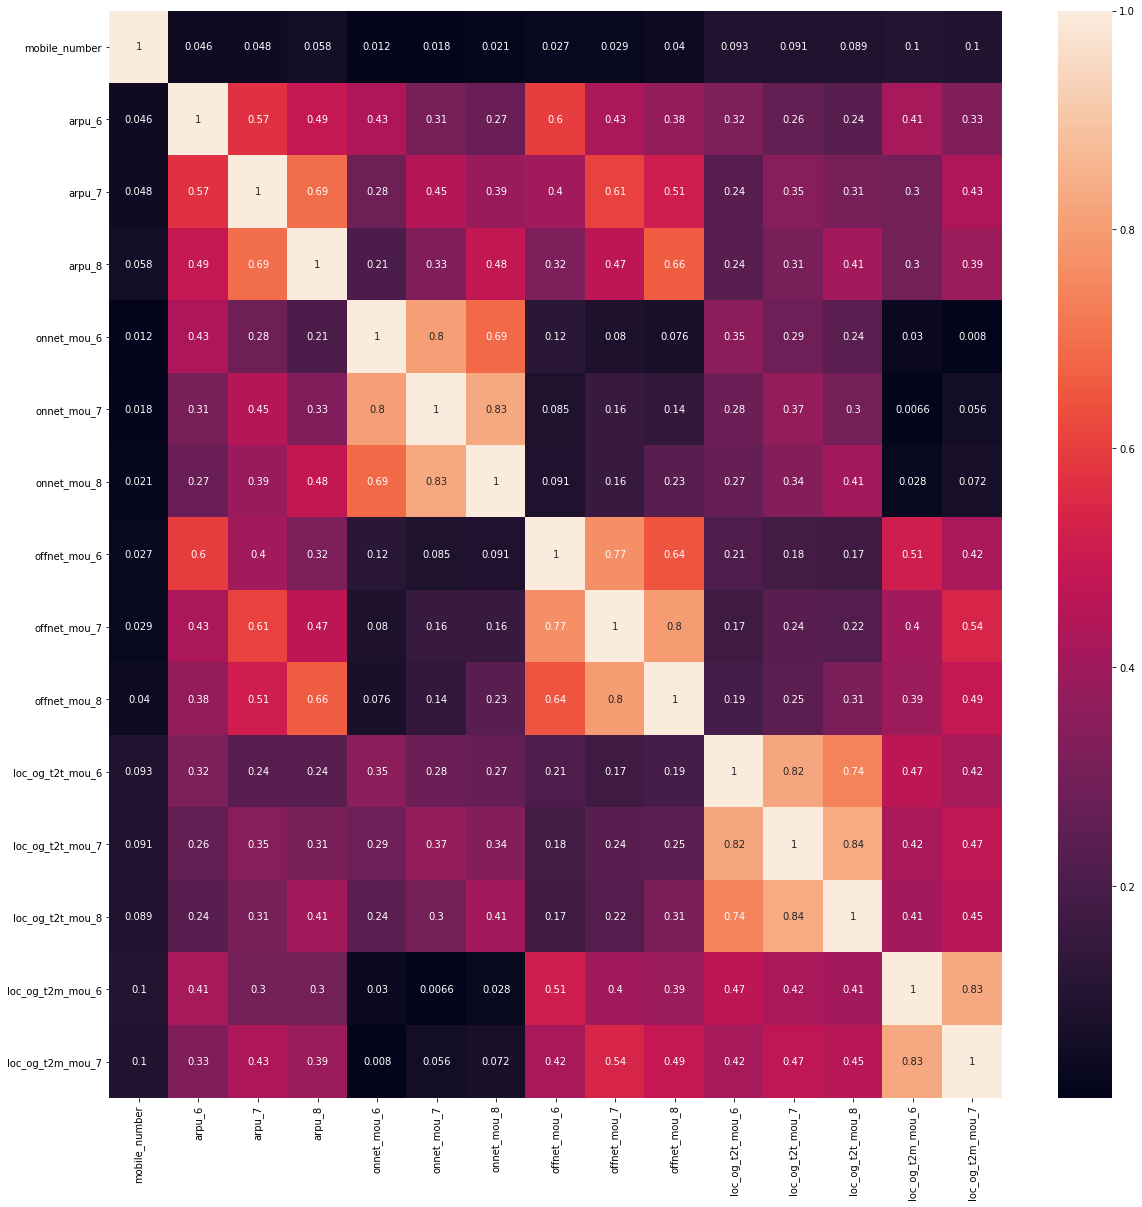

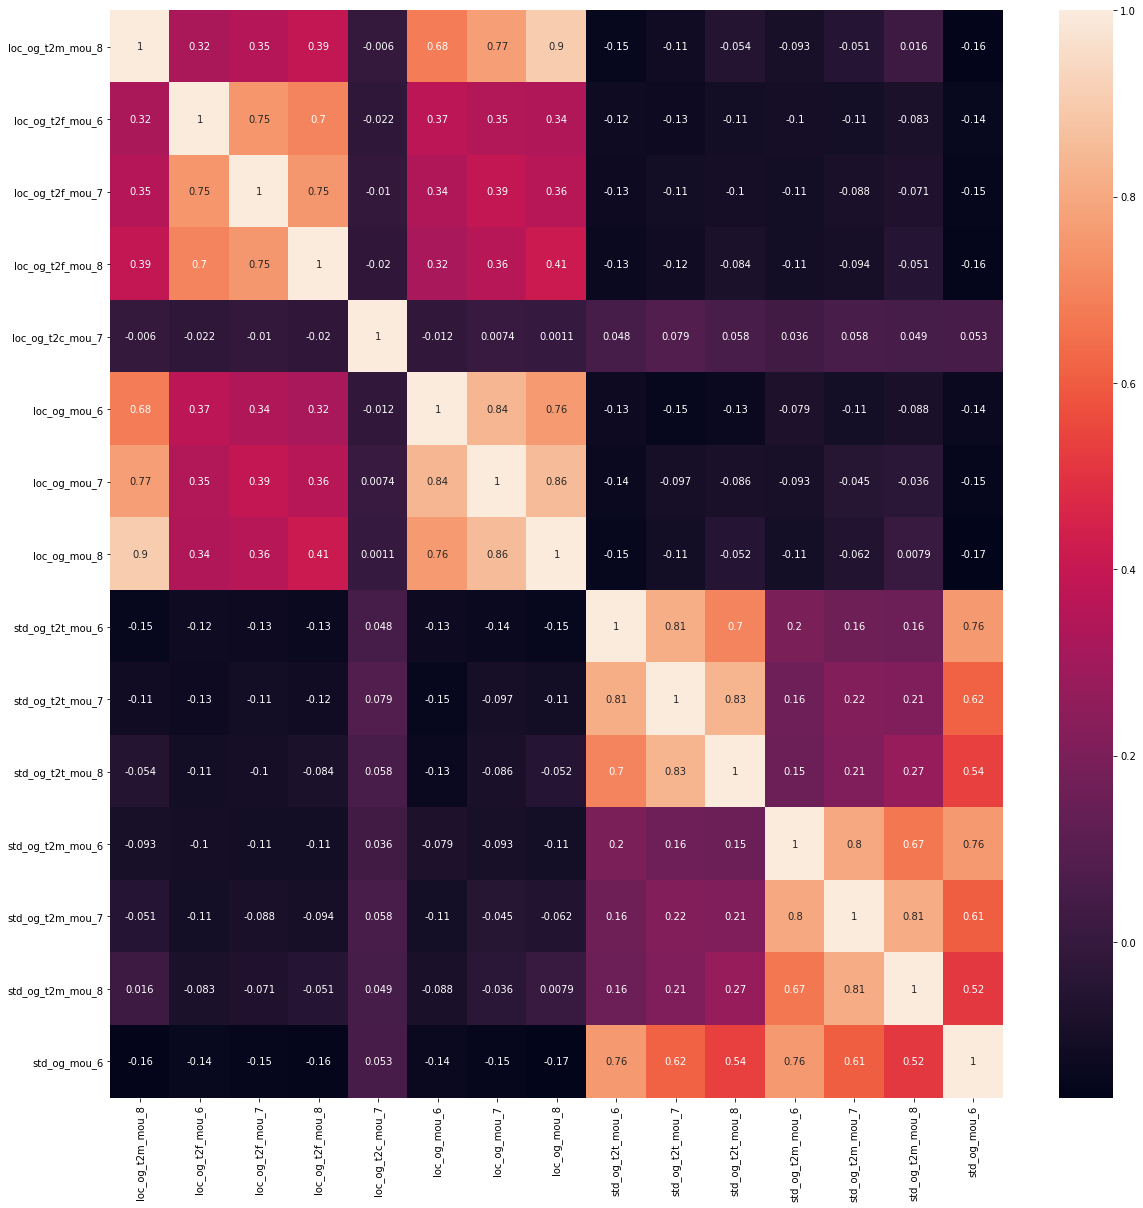

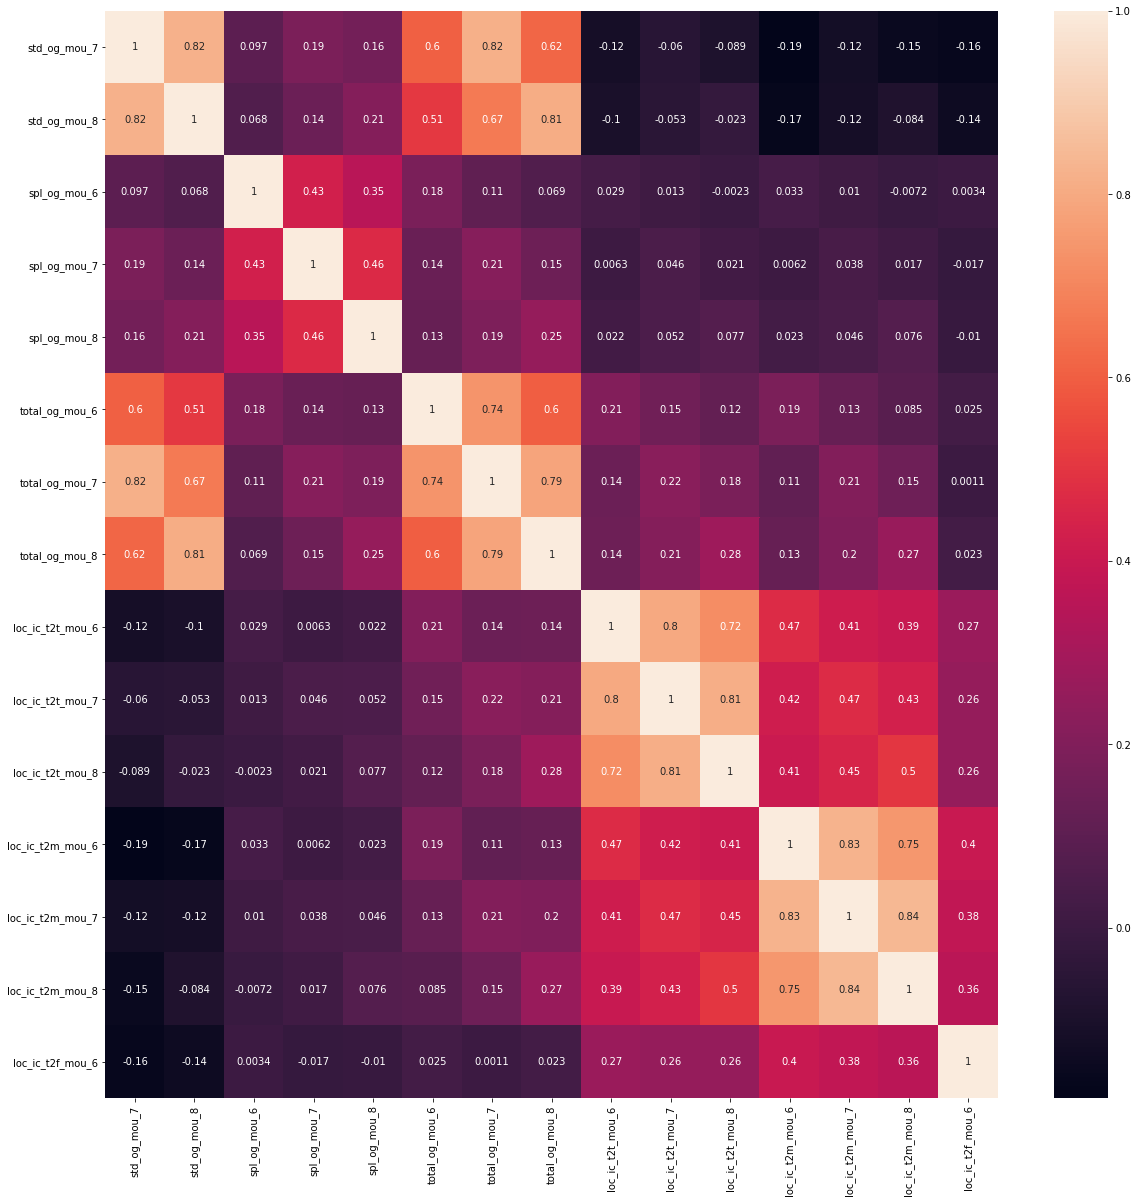

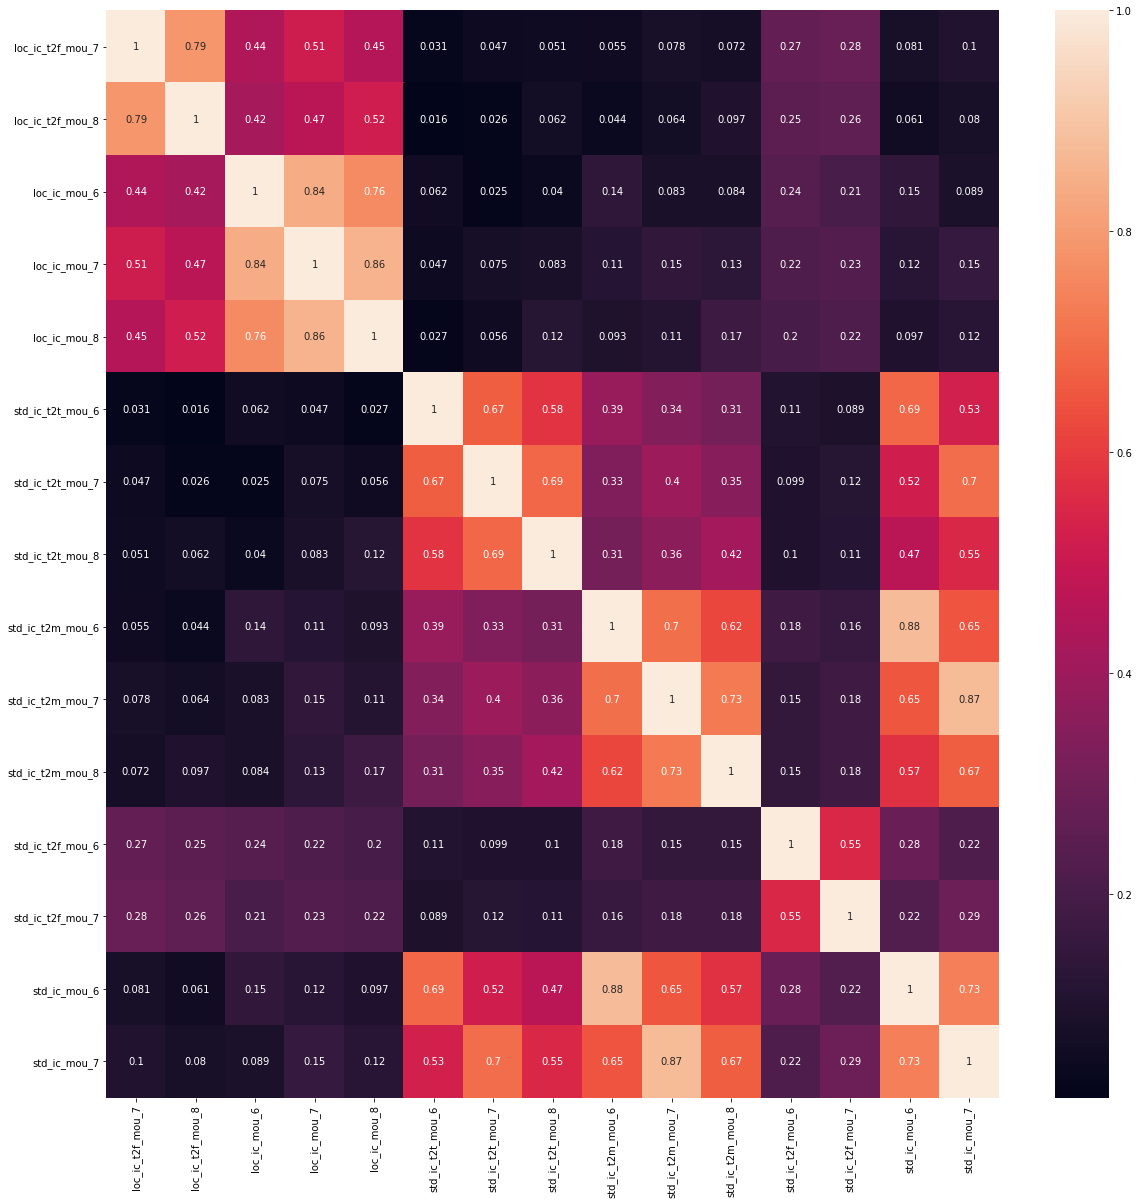

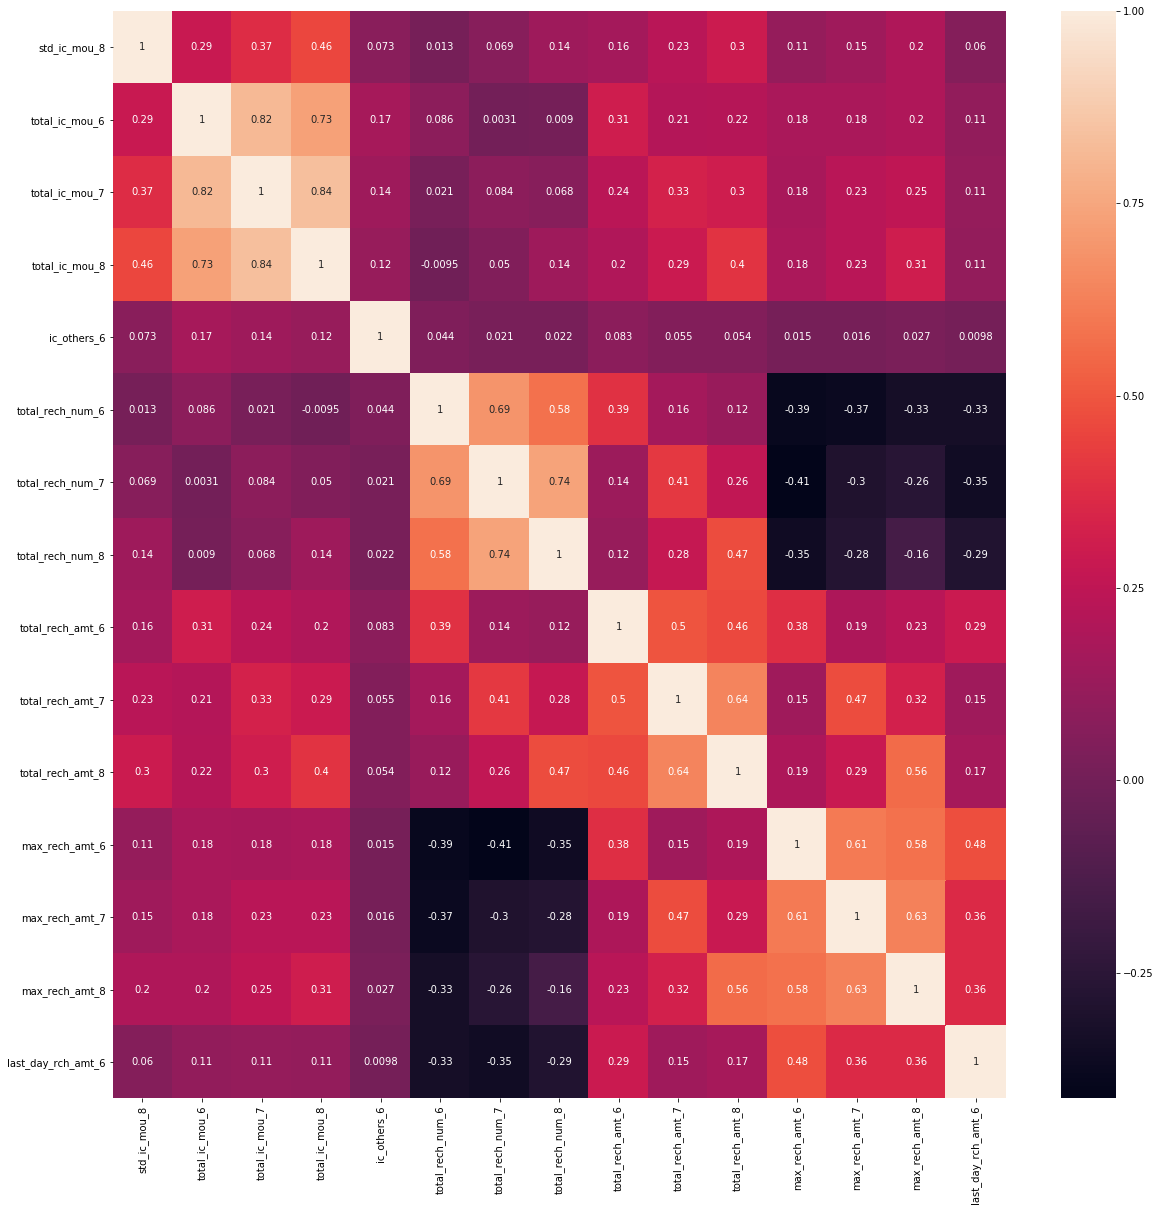

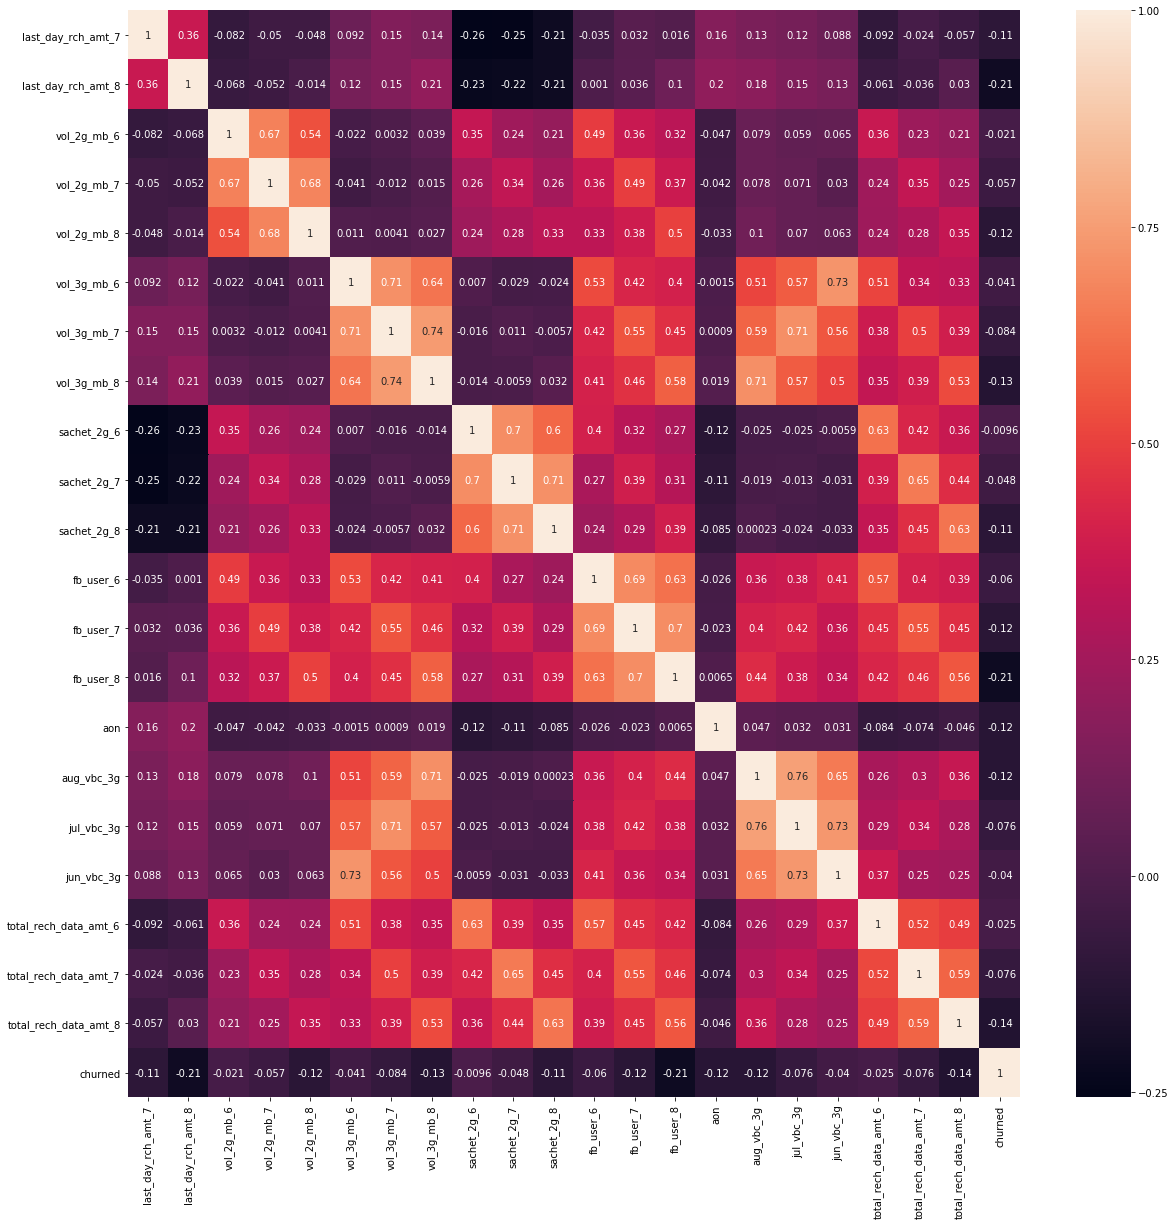

In [36]:
# Check the correlation matrix or heatmap . Dividing 45 variables in 3 sets of 15 variables for better visuals.
plt.figure(figsize = (20,20))
CorrDF=tc_hvc.iloc[:,0:15]
sns.heatmap(CorrDF.corr(),annot = True)
plt.show()

plt.figure(figsize = (20,20))
CorrDF=tc_hvc.iloc[:,15:30]
sns.heatmap(CorrDF.corr(),annot = True)
plt.show()

plt.figure(figsize = (20,20))
CorrDF=tc_hvc.iloc[:,30:45]
sns.heatmap(CorrDF.corr(),annot = True)
plt.show()

plt.figure(figsize = (20,20))
CorrDF=tc_hvc.iloc[:,45:60]
sns.heatmap(CorrDF.corr(),annot = True)
plt.show()

plt.figure(figsize = (20,20))
CorrDF=tc_hvc.iloc[:,60:75]
sns.heatmap(CorrDF.corr(),annot = True)
plt.show()

plt.figure(figsize = (20,20))
CorrDF=tc_hvc.iloc[:,75:97]
sns.heatmap(CorrDF.corr(),annot = True)
plt.show()

From the above heat maps, we can see there are few fields which exhibit multicollinearity and thus should be removed

In [37]:
mc_cols_to_be_del = ['onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6',
                    'loc_og_t2m_mou_7','loc_og_t2f_mou_6','loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7',
                    'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_mou_7','std_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6',
                    'loc_ic_t2m_mou_7','loc_ic_mou_6','loc_ic_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7','total_ic_mou_6','total_ic_mou_7']
tc_hvc.drop(columns=mc_cols_to_be_del,inplace=True)

In [38]:
tc_hvc.shape

(30014, 69)

In [39]:
Mobile_Number = tc_hvc['mobile_number']
tc_hvc.drop(['mobile_number'],inplace=True,axis=1)

In [40]:
tc_hvc.shape

(30014, 68)

In [41]:
tc_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30014 entries, 0 to 99998
Data columns (total 68 columns):
arpu_6                   30014 non-null float64
arpu_7                   30014 non-null float64
arpu_8                   30014 non-null float64
onnet_mou_8              30014 non-null float64
offnet_mou_8             30014 non-null float64
loc_og_t2t_mou_8         30014 non-null float64
loc_og_t2f_mou_7         30014 non-null float64
loc_og_t2f_mou_8         30014 non-null float64
loc_og_t2c_mou_7         30014 non-null float64
loc_og_mou_8             30014 non-null float64
std_og_t2t_mou_8         30014 non-null float64
std_og_t2m_mou_8         30014 non-null float64
std_og_mou_6             30014 non-null float64
spl_og_mou_6             30014 non-null float64
spl_og_mou_7             30014 non-null float64
spl_og_mou_8             30014 non-null float64
total_og_mou_6           30014 non-null float64
total_og_mou_7           30014 non-null float64
total_og_mou_8           30

### Modelling:

#### Model 1: Logistic Regression 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

In [43]:
# Splitting the data into train and test
X=tc_hvc.drop(['churned'],axis=1)
y=tc_hvc['churned']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape , X_test.shape)

(21009, 67) (9005, 67)


In [44]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_mou_8,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
56644,428.420,255.781,412.770,88.9300,356.3600,60.34,8.31,0.38,0.0,275.63,...,1.0,1.0,1.0,275.0,930.994,979.9365,885.149,2060.0,449.0,455.0
83781,319.914,272.677,374.045,40.7300,96.2600,30.58,0.60,0.00,0.0,122.03,...,1.0,1.0,1.0,738.0,291.960,462.8200,849.810,716.0,179.0,179.0
20930,392.448,436.216,131.187,8.3100,100.8900,8.31,1.93,0.00,0.0,99.64,...,0.0,0.0,0.0,1703.0,0.000,0.0000,0.000,0.0,0.0,0.0
91436,417.487,513.947,735.785,1051.0885,29.6300,0.00,0.00,0.00,0.0,0.36,...,0.0,0.0,0.0,1858.0,0.000,0.0000,0.000,0.0,0.0,0.0
1968,726.610,797.577,785.532,109.8800,1148.1705,3.46,0.00,0.00,0.0,10.68,...,0.0,0.0,0.0,303.0,0.000,0.0000,0.000,0.0,0.0,0.0


In [45]:
x_train_scaled_fields = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_8',
       'ic_others_6', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8']

In [46]:
scaler = StandardScaler()
X_train[x_train_scaled_fields] = scaler.fit_transform(X_train[x_train_scaled_fields])
print(X_train.head())

         arpu_6    arpu_7    arpu_8  onnet_mou_8  offnet_mou_8  \
50022 -0.567132  0.234144 -0.502476    -0.498617     -0.867418   
18718 -0.859721 -1.125095 -0.427766    -0.576713     -0.590783   
4697  -0.874926 -1.359708 -0.607004    -0.671873     -0.848188   
15296  0.517050  2.348834  2.341331    -0.423989      2.651334   
39141  0.004982 -0.382791 -0.273540    -0.435622     -0.850049   

       loc_og_t2t_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_7  \
50022         -0.674266         -0.118599         -0.523806         -0.420657   
18718         -0.386972         -0.277474         -0.523806          0.252527   
4697          -0.694517         -0.529229         -0.523806         -0.420657   
15296         -0.594392         -0.529229         -0.523806         -0.420657   
39141         -0.430619         -0.529229         -0.523806          1.514746   

       loc_og_mou_8  ...  fb_user_6  fb_user_7  fb_user_8       aon  \
50022     -0.806546  ...        0.0        1.

In [47]:
#Selecting features from RFE
logreg=LogisticRegression(class_weight='balanced')  # LogisticRegression instance
rfe=RFE(logreg,15)           # Select 15 columns using RFE
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [48]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8', 'aon', 'aug_vbc_3g'],
      dtype='object')

In [49]:
# Build model using RFE selected columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                21009
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.4
Date:                Mon, 23 Mar 2020   Deviance:                       8024.8
Time:                        16:10:07   Pearson chi2:                 6.56e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2559      0.069    -47.474      0.000      -3.390      -3.121
arpu_6                 0.3310      0.032     10.444      0.000       0.269       0.393
arpu_7                 0.2660      0.035      7.554      0.000       0.197       0.335
onnet_mou_8            0.3841      0.115      3.340      0.001       0.159       0.610
offnet_mou_8           0.2721      0.102      2.674      0.007       0.073       0.472
loc_og_mou_8          -0.7379      0.097     -7.635      0.000      -0.927      -0.549
std_og_t2t_mou_8      -0.6122      0.107     -5.712      0.000      -0.822      -0.402
std_og_t2m_mou_8      -0.5274      0.086     -6.163      0.000      -0.695      -0.360
loc_ic_t2t_mou_8      -0.5928      0.130     -4.577      0.000      -0.847      -0.339
loc_ic_t2m_mou_8      -1.1117      0.211     -5.271      0.000      -1.525      -0.698
loc_ic_mou_8           0.2726      0.266      1.026      0.305      -0.248       0.793
total_rech_num_8      -0.6178      0.050    -12.357      0.000      -0.716      -0.520
last_day_rch_amt_8    -0.6651      0.045    -14.749      0.000      -0.754      -0.577
fb_user_8             -1.3483      0.085    -15.820      0.000      -1.515      -1.181
aon                   -0.2590      0.037     -6.941      0.000      -0.332      -0.186
aug_vbc_3g            -0.3725      0.057     -6.515      0.000      -0.485      -0.260
======================================================================================
"""

We have to remove loc_ic_mou_8

In [50]:
# Drop the column 'loc_ic_mou_8'
col=col.drop('loc_ic_mou_8',1)
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'fb_user_8', 'aon', 'aug_vbc_3g'],
      dtype='object')

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                21009
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.9
Date:                Mon, 23 Mar 2020   Deviance:                       8025.8
Time:                        16:10:08   Pearson chi2:                 6.79e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2586      0.069    -47.449      0.000      -3.393      -3.124
arpu_6                 0.3310      0.032     10.444      0.000       0.269       0.393
arpu_7                 0.2660      0.035      7.556      0.000       0.197       0.335
onnet_mou_8            0.3847      0.115      3.339      0.001       0.159       0.610
offnet_mou_8           0.2732      0.102      2.683      0.007       0.074       0.473
loc_og_mou_8          -0.7377      0.097     -7.622      0.000      -0.927      -0.548
std_og_t2t_mou_8      -0.6137      0.107     -5.717      0.000      -0.824      -0.403
std_og_t2m_mou_8      -0.5292      0.086     -6.181      0.000      -0.697      -0.361
loc_ic_t2t_mou_8      -0.4908      0.080     -6.120      0.000      -0.648      -0.334
loc_ic_t2m_mou_8      -0.9185      0.096     -9.587      0.000      -1.106      -0.731
total_rech_num_8      -0.6199      0.050    -12.404      0.000      -0.718      -0.522
last_day_rch_amt_8    -0.6648      0.045    -14.737      0.000      -0.753      -0.576
fb_user_8             -1.3467      0.085    -15.801      0.000      -1.514      -1.180
aon                   -0.2582      0.037     -6.918      0.000      -0.331      -0.185
aug_vbc_3g            -0.3707      0.057     -6.491      0.000      -0.483      -0.259
======================================================================================
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,offnet_mou_8,10.28
2,onnet_mou_8,9.35
5,std_og_t2t_mou_8,7.94
4,loc_og_mou_8,7.01
6,std_og_t2m_mou_8,6.52
8,loc_ic_t2m_mou_8,2.08
1,arpu_7,1.99
7,loc_ic_t2t_mou_8,1.74
0,arpu_6,1.54
9,total_rech_num_8,1.46


There is a high value of VIF for offnet_mou_8

In [53]:
# Drop the column 'offnet_mou_8'
col=col.drop('offnet_mou_8',1)
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'aon',
       'aug_vbc_3g'],
      dtype='object')

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                21009
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4016.4
Date:                Mon, 23 Mar 2020   Deviance:                       8032.9
Time:                        16:10:08   Pearson chi2:                 7.81e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2524      0.069    -47.388      0.000      -3.387      -3.118
arpu_6                 0.3378      0.032     10.684      0.000       0.276       0.400
arpu_7                 0.2842      0.035      8.225      0.000       0.216       0.352
onnet_mou_8            0.3901      0.113      3.446      0.001       0.168       0.612
loc_og_mou_8          -0.6324      0.090     -7.034      0.000      -0.809      -0.456
std_og_t2t_mou_8      -0.6403      0.105     -6.088      0.000      -0.846      -0.434
std_og_t2m_mou_8      -0.3288      0.042     -7.849      0.000      -0.411      -0.247
loc_ic_t2t_mou_8      -0.5175      0.080     -6.496      0.000      -0.674      -0.361
loc_ic_t2m_mou_8      -0.8988      0.095     -9.425      0.000      -1.086      -0.712
total_rech_num_8      -0.5946      0.049    -12.186      0.000      -0.690      -0.499
last_day_rch_amt_8    -0.6408      0.044    -14.572      0.000      -0.727      -0.555
fb_user_8             -1.3580      0.085    -15.954      0.000      -1.525      -1.191
aon                   -0.2546      0.037     -6.827      0.000      -0.328      -0.182
aug_vbc_3g            -0.3729      0.057     -6.528      0.000      -0.485      -0.261
======================================================================================
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,onnet_mou_8,7.85
4,std_og_t2t_mou_8,7.16
3,loc_og_mou_8,3.17
7,loc_ic_t2m_mou_8,2.06
1,arpu_7,1.93
6,loc_ic_t2t_mou_8,1.69
0,arpu_6,1.52
8,total_rech_num_8,1.44
5,std_og_t2m_mou_8,1.32
9,last_day_rch_amt_8,1.28


In [56]:
# Drop the column 'onnet_mou_8'
col=col.drop('onnet_mou_8',1)
col

Index(['arpu_6', 'arpu_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'aon',
       'aug_vbc_3g'],
      dtype='object')

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                21009
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4022.0
Date:                Mon, 23 Mar 2020   Deviance:                       8044.0
Time:                        16:10:09   Pearson chi2:                 7.27e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2467      0.069    -47.333      0.000      -3.381      -3.112
arpu_6                 0.3409      0.032     10.790      0.000       0.279       0.403
arpu_7                 0.2976      0.034      8.669      0.000       0.230       0.365
loc_og_mou_8          -0.4986      0.080     -6.227      0.000      -0.655      -0.342
std_og_t2t_mou_8      -0.3058      0.041     -7.482      0.000      -0.386      -0.226
std_og_t2m_mou_8      -0.3498      0.041     -8.431      0.000      -0.431      -0.268
loc_ic_t2t_mou_8      -0.4862      0.079     -6.154      0.000      -0.641      -0.331
loc_ic_t2m_mou_8      -0.9765      0.094    -10.343      0.000      -1.161      -0.791
total_rech_num_8      -0.5735      0.048    -11.929      0.000      -0.668      -0.479
last_day_rch_amt_8    -0.6265      0.044    -14.377      0.000      -0.712      -0.541
fb_user_8             -1.3698      0.085    -16.107      0.000      -1.537      -1.203
aon                   -0.2533      0.037     -6.792      0.000      -0.326      -0.180
aug_vbc_3g            -0.3750      0.057     -6.562      0.000      -0.487      -0.263
======================================================================================
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,2.24
1,arpu_7,1.93
6,loc_ic_t2m_mou_8,1.84
5,loc_ic_t2t_mou_8,1.53
0,arpu_6,1.52
7,total_rech_num_8,1.43
4,std_og_t2m_mou_8,1.31
3,std_og_t2t_mou_8,1.29
8,last_day_rch_amt_8,1.28
9,fb_user_8,1.19


From the above, we can see that both p-value and vif are within the range. So we will go ahead. 

In [59]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

50022    0.018392
18718    0.017732
4697     0.012153
15296    0.077343
39141    0.045671
dtype: float64

In [60]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
50022,0,0.018392,50022
18718,0,0.017732,18718
4697,0,0.012153,4697
15296,0,0.077343,15296
39141,0,0.045671,39141


In [61]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
50022,0,0.018392,50022,0
18718,0,0.017732,18718,0
4697,0,0.012153,4697,0
15296,0,0.077343,15296,0
39141,0,0.045671,39141,0


In [62]:
from sklearn import metrics

In [63]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16198  2954]
 [  376  1481]]


In [64]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8414965014993574


In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7975228863758751

In [67]:
(TP+TN)/(TP+TN+FN+FP)

0.8414965014993574

Plotiing the ROC curve

In [68]:
# function for plotting RIC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

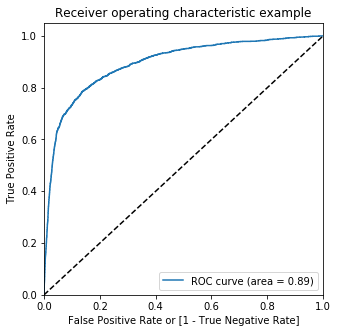

In [69]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Finding optimal cut-off point

In [70]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
50022,0,0.018392,50022,0,1,0,0,0,0,0,0,0,0,0
18718,0,0.017732,18718,0,1,0,0,0,0,0,0,0,0,0
4697,0,0.012153,4697,0,1,0,0,0,0,0,0,0,0,0
15296,0,0.077343,15296,0,1,0,0,0,0,0,0,0,0,0
39141,0,0.045671,39141,0,1,0,0,0,0,0,0,0,0,0


In [71]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.088391  1.000000  0.000000
0.1   0.1  0.841497  0.797523  0.845760
0.2   0.2  0.898044  0.712439  0.916040
0.3   0.3  0.919987  0.647281  0.946429
0.4   0.4  0.928650  0.536349  0.966688
0.5   0.5  0.927698  0.357566  0.982978
0.6   0.6  0.920796  0.170705  0.993525
0.7   0.7  0.915988  0.070005  0.998016
0.8   0.8  0.913370  0.023694  0.999635
0.9   0.9  0.911609  0.000000  1.000000


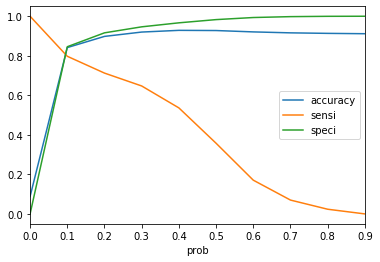

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability. We have already used it above during training.

####  Making predictions on the test set

In [73]:
X_test[x_train_scaled_fields] = scaler.transform(X_test[x_train_scaled_fields])

In [74]:
X_test = X_test[col]
X_test.head()

,arpu_6,arpu_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,total_rech_num_8,last_day_rch_amt_8,fb_user_8,aon,aug_vbc_3g
56644,-0.388073,-0.830093,0.290306,-0.354004,-0.114648,0.177034,-0.221661,-0.742752,0.869964,1.0,-0.996886,3.011654
83781,-0.750925,-0.776644,-0.343255,-0.478068,-0.538266,0.393432,0.504159,-0.458499,-0.354540,1.0,-0.494809,0.594608
20930,-0.508366,-0.259305,-0.435608,-0.478068,-0.536207,-0.723937,-0.426615,-1.027005,0.625064,0.0,0.551635,-0.509685
91436,-0.424634,-0.013411,-0.845112,3.247959,-0.404396,-0.765242,-0.852557,-0.174247,2.094469,0.0,0.719717,-0.509685
1968,0.609095,0.883823,-0.802545,-0.016148,3.138810,-0.601010,-0.715683,2.526154,-0.599441,0.0,-0.966522,-0.509685


In [75]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [76]:
y_test_pred = res.predict(X_test_sm)

In [77]:
y_test_pred[:10]

56644    0.002849
83781    0.007434
20930    0.126870
91436    0.021355
1968     0.042493
48230    0.037319
39836    0.013137
39053    0.001528
89749    0.017527
63230    0.019267
dtype: float64

In [78]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [79]:
# Let's see the head
y_pred_1.head()

,0
56644,0.002849
83781,0.007434
20930,0.126870
91436,0.021355
1968,0.042493


In [82]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [83]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [84]:
y_test_df.head()

,churned,CustID
56644,0,56644
83781,0,83781
20930,0,20930
91436,0,91436
1968,0,1968


In [85]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [86]:
y_test_df.head()

,churned,CustID
0,0,56644
1,0,83781
2,0,20930
3,0,91436
4,0,1968


In [87]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [88]:
y_pred_final.head()

,churned,CustID,0
0,0,56644,0.002849
1,0,83781,0.007434
2,0,20930,0.126870
3,0,91436,0.021355
4,0,1968,0.042493


In [89]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [90]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churned','Churn_Prob'], axis=1)

In [91]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churned,Churn_Prob
0,56644,0,0.002849
1,83781,0,0.007434
2,20930,0,0.126870
3,91436,0,0.021355
4,1968,0,0.042493


In [92]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [93]:
y_pred_final.head()

,CustID,churned,Churn_Prob,final_predicted
0,56644,0,0.002849,0
1,83781,0,0.007434,0
2,20930,0,0.126870,1
3,91436,0,0.021355,0
4,1968,0,0.042493,0


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churned, y_pred_final.final_predicted)

0.8418656302054415

In [95]:
confusion2 = metrics.confusion_matrix(y_pred_final.churned, y_pred_final.final_predicted )
confusion2

array([[6938, 1282],
       [ 142,  643]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8191082802547771

#### The important variables contributing to the churn are:

### Next, we will do PCA on the data

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape , X_test.shape)

(21009, 67) (9005, 67)


In [99]:
scaler = StandardScaler()
X_train[x_train_scaled_fields] = scaler.fit_transform(X_train[x_train_scaled_fields])
X_test[x_train_scaled_fields] = scaler.transform(X_test[x_train_scaled_fields])

In [100]:
# Import  PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized' , random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

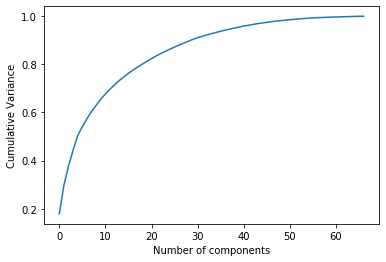

In [101]:
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.show()

We will perfomr PCA with 30 components

In [102]:
from sklearn.decomposition import IncrementalPCA

In [103]:
pca_final = IncrementalPCA(n_components = 30)
df_pca = pca_final.fit_transform(X_train)

In [104]:
df_pca.shape

(21009, 30)

In [105]:
corrmat = np.corrcoef(df_pca.transpose())

Plotting the heatmap of corr matrix

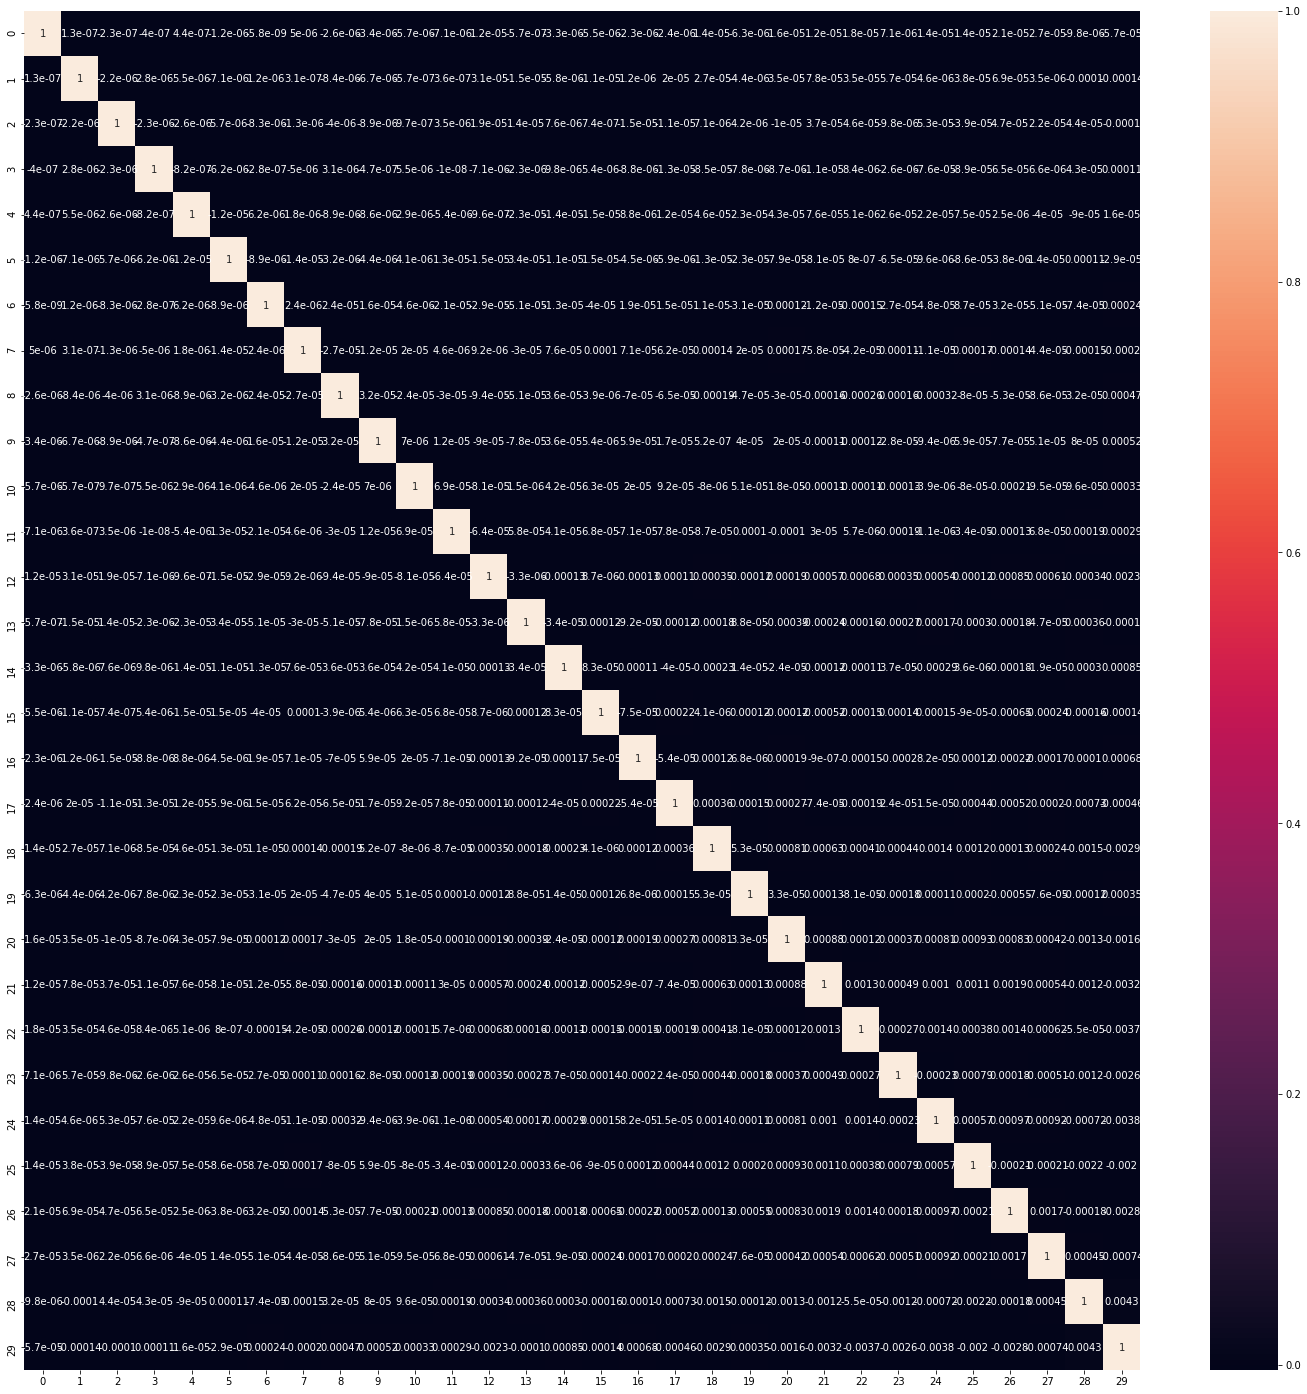

In [106]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

From the above heatmap, we can see that there is hardly any correlation between the components.

Applying transformation on test set

In [107]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9005, 30)

### Model 2: Logistic regression on the data on our Principal components

In [108]:
learner_pca = LogisticRegression(class_weight='balanced')

In [109]:
model_pca = learner_pca.fit(df_pca , y_train)

Making predictions on the training set

In [110]:
# Getting the predicted values on the train set
y_train_pred_2 = model_pca.predict_proba(df_pca)
y_train_pred_2[:5]

array([[0.69321132, 0.30678868],
       [0.97045028, 0.02954972],
       [0.96683696, 0.03316304],
       [0.75188064, 0.24811936],
       [0.6007293 , 0.3992707 ]])

In [111]:
y_pred_train_2 = pd.DataFrame(y_train_pred_2)

In [112]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)

In [113]:
# Putting ID to index
y_train_df['ID'] = y_train_df.index

In [114]:
# Removing index for both dataframes to append them side by side 
y_pred_train_2.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

In [115]:
# Appending y_test_df and y_pred_1
y_train_pred_final = pd.concat([y_train_df, y_pred_train_2],axis=1)

In [116]:
y_train_pred_final.head()

,churned,CustID,0,1
0,0,50022,0.693211,0.306789
1,0,18718,0.970450,0.029550
2,0,4697,0.966837,0.033163
3,0,15296,0.751881,0.248119
4,0,39141,0.600729,0.399271


In [117]:
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [118]:
y_train_pred_final.head()

,churned,CustID,0,Churn_Prob
0,0,50022,0.693211,0.306789
1,0,18718,0.970450,0.029550
2,0,4697,0.966837,0.033163
3,0,15296,0.751881,0.248119
4,0,39141,0.600729,0.399271


In [119]:
y_train_pred_final.Churn_Prob

0        0.306789
1        0.029550
2        0.033163
3        0.248119
4        0.399271
5        0.241557
6        0.004437
7        0.034562
8        0.036186
9        0.271193
10       0.759997
11       0.195109
12       0.397536
13       0.108463
14       0.820295
15       0.304605
16       0.773451
17       0.288275
18       0.855687
19       0.308442
20       0.377476
21       0.327208
22       0.226362
23       0.814708
24       0.389391
25       0.387978
26       0.949902
27       0.414976
28       0.714599
29       0.008689
           ...   
20979    0.256640
20980    0.096103
20981    0.404824
20982    0.015188
20983    0.444344
20984    0.052295
20985    0.631083
20986    0.602724
20987    0.019884
20988    0.169876
20989    0.131223
20990    0.009433
20991    0.014615
20992    0.221273
20993    0.394367
20994    0.132036
20995    0.015931
20996    0.327412
20997    0.423726
20998    0.043091
20999    0.005258
21000    0.541054
21001    0.066905
21002    0.079202
21003    0

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [121]:
y_train_pred_final.head()

,churned,CustID,0,Churn_Prob,final_predicted
0,0,50022,0.693211,0.306789,0
1,0,18718,0.970450,0.029550,0
2,0,4697,0.966837,0.033163,0
3,0,15296,0.751881,0.248119,0
4,0,39141,0.600729,0.399271,0


In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churned,CustID,0,Churn_Prob,final_predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,50022,1,0.306789,0,1,1,1,0,0,0,0,0,0
1,0,18718,1,0.029550,0,0,0,0,0,0,0,0,0,0
2,0,4697,1,0.033163,0,0,0,0,0,0,0,0,0,0
3,0,15296,1,0.248119,0,1,1,0,0,0,0,0,0,0
4,0,39141,1,0.399271,0,1,1,1,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.088391  1.000000  0.000000
0.1   0.1  0.410586  0.973075  0.356046
0.2   0.2  0.562616  0.941303  0.525898
0.3   0.3  0.668951  0.908454  0.645729
0.4   0.4  0.751963  0.870759  0.740445
0.5   0.5  0.817221  0.822833  0.816677
0.6   0.6  0.864439  0.771136  0.873486
0.7   0.7  0.897615  0.709747  0.915831
0.8   0.8  0.920510  0.594507  0.952120
0.9   0.9  0.921557  0.268174  0.984910


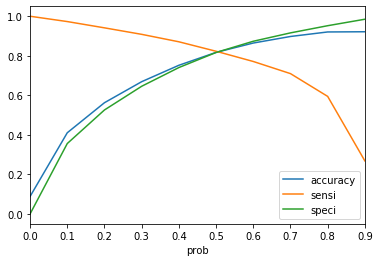

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [125]:
# Confusion matrix 
confusion_train = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final.final_predicted )
print(confusion)

[[16198  2954]
 [  376  1481]]


In [126]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8228325255788906

In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churned, y_pred_final.final_predicted)

0.8418656302054415

Making predictions on the test set

In [129]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [130]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.9'

In [131]:
pred_probs_test[0:10]

array([[0.95742135, 0.04257865],
       [0.85682879, 0.14317121],
       [0.49639897, 0.50360103],
       [0.81221475, 0.18778525],
       [0.57245898, 0.42754102],
       [0.92884965, 0.07115035],
       [0.85014849, 0.14985151],
       [0.89943938, 0.10056062],
       [0.8180116 , 0.1819884 ],
       [0.83733735, 0.16266265]])

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(pred_probs_test)

In [133]:
y_pred_2.head()

,0,1
0,0.957421,0.042579
1,0.856829,0.143171
2,0.496399,0.503601
3,0.812215,0.187785
4,0.572459,0.427541


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [136]:
y_test_df.head()

,churned,CustID
56644,0,56644
83781,0,83781
20930,0,20930
91436,0,91436
1968,0,1968


In [137]:
# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_2],axis=1)

In [139]:
y_pred_final.head()

,churned,CustID,0,1
0,0,56644,0.957421,0.042579
1,0,83781,0.856829,0.143171
2,0,20930,0.496399,0.503601
3,0,91436,0.812215,0.187785
4,0,1968,0.572459,0.427541


In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [141]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churned','Churn_Prob'], axis=1)

In [142]:
y_pred_final.head()

,CustID,churned,Churn_Prob
0,56644,0,0.042579
1,83781,0,0.143171
2,20930,0,0.503601
3,91436,0,0.187785
4,1968,0,0.427541


In [143]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)

In [144]:
y_pred_final.head()

,CustID,churned,Churn_Prob,final_predicted
0,56644,0,0.042579,0
1,83781,0,0.143171,0
2,20930,0,0.503601,0
3,91436,0,0.187785,0
4,1968,0,0.427541,0


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churned, y_pred_final.final_predicted)

0.824764019988895

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.churned, y_pred_final.final_predicted )
confusion2

array([[6773, 1447],
       [ 131,  654]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8331210191082803

### Model 3: Modelling with Decision Trees

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dt_default = DecisionTreeClassifier(max_depth=3, class_weight='balanced')

In [339]:
df_pca.shape

(21009, 30)

In [340]:
dt_default.fit(df_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [341]:
y_pred = dt_default.predict(df_test_pca)

In [342]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6652970571904497


In [156]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [343]:
confusion3 = metrics.confusion_matrix(y_test, y_pred)
confusion3

array([[5363, 2857],
       [ 157,  628]], dtype=int64)

In [344]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [345]:
# Let's see the sensitivity of our Decision Tree model
TP / float(TP+FN)

0.8

Let's tune the hyperparameters

In [346]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
dt = DecisionTreeClassifier(class_weight='balanced')


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
dt.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 20, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
            

In [347]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.301394,0.010944,0.005019,0.005730,2,{'max_depth': 2},0.814180,0.815132,0.799572,0.835991,...,0.815365,0.011729,4,0.819231,0.818577,0.796704,0.842099,0.819431,0.819208,0.014359
1,0.939311,0.020683,0.003811,0.005965,7,{'max_depth': 7},0.804901,0.821318,0.828612,0.815520,...,0.820125,0.009269,3,0.847257,0.853624,0.852094,0.844479,0.853165,0.850124,0.003618
2,1.296371,0.018819,0.003923,0.006049,12,{'max_depth': 12},0.855341,0.852486,0.862652,0.856225,...,0.860488,0.008320,2,0.928180,0.929846,0.925928,0.924262,0.929914,0.927626,0.002221
3,1.408348,0.060593,0.000799,0.001598,17,{'max_depth': 17},0.872472,0.877468,0.878600,0.880267,...,0.879861,0.005921,1,0.962216,0.963227,0.958710,0.963172,0.962101,0.961885,0.001655


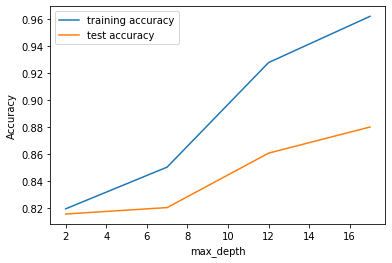

In [348]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [349]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
dt = DecisionTreeClassifier(max_depth=4,class_weight='balanced')


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
dt.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [350]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093267,0.005505,0.003955,0.006113,4,{'max_features': 4},0.806805,0.638591,0.676506,0.584147,...,0.693512,0.080899,5,0.822147,0.658396,0.674679,0.588589,0.760352,0.700832,0.081662
1,0.166301,0.002685,0.000000,0.000000,8,{'max_features': 8},0.759933,0.652629,0.746013,0.619614,...,0.709934,0.061694,4,0.775854,0.671189,0.743812,0.614707,0.777308,0.716574,0.063846
2,0.278774,0.006500,0.001273,0.001641,14,{'max_features': 14},0.817749,0.767547,0.766960,0.799810,...,0.762340,0.054910,3,0.837439,0.776865,0.774393,0.818717,0.666171,0.774717,0.059426
3,0.384494,0.008464,0.005257,0.005951,20,{'max_features': 20},0.769926,0.772305,0.758153,0.721257,...,0.766671,0.029001,2,0.783054,0.792098,0.759043,0.734769,0.822525,0.778298,0.029781
4,0.461780,0.003730,0.000799,0.001598,24,{'max_features': 24},0.788960,0.794433,0.781957,0.825280,...,0.798991,0.015040,1,0.794657,0.804296,0.776951,0.835257,0.806699,0.803572,0.018986


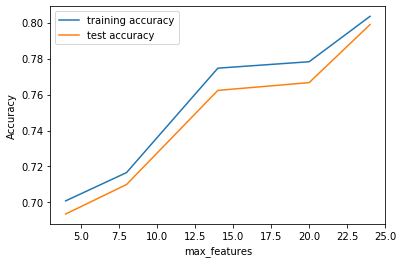

In [351]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [352]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
dt = DecisionTreeClassifier(class_weight='balanced')


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
dt.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [353]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.994953,0.029900,0.000799,0.001598,100,{'min_samples_leaf': 100},0.781585,0.779681,0.792906,0.794335,...,0.782189,0.011481,5,0.799060,0.795966,0.803010,0.806580,0.785935,0.798110,0.007064
1,0.925774,0.025026,0.002588,0.002143,150,{'min_samples_leaf': 150},0.774447,0.785391,0.799810,0.791716,...,0.787853,0.008291,2,0.792039,0.805367,0.800571,0.802356,0.802475,0.800562,0.004530
2,0.880626,0.031779,0.001012,0.001119,200,{'min_samples_leaf': 200},0.775161,0.787295,0.812426,0.815520,...,0.789281,0.022512,1,0.793645,0.804237,0.808841,0.823715,0.771002,0.800288,0.017546
3,0.832563,0.029534,0.003922,0.006048,250,{'min_samples_leaf': 250},0.764930,0.778729,0.809569,0.800524,...,0.784997,0.017181,3,0.781507,0.792217,0.804498,0.809436,0.788434,0.795218,0.010308
4,0.787629,0.029335,0.006845,0.007250,300,{'min_samples_leaf': 300},0.762075,0.771830,0.778862,0.805284,...,0.784188,0.017120,4,0.778829,0.790908,0.774750,0.816337,0.804736,0.793112,0.015624


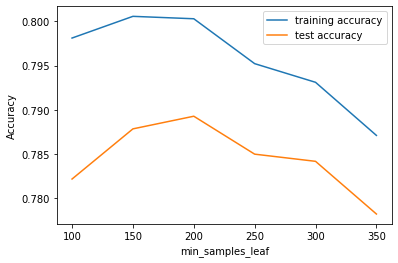

In [354]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [355]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
dt = DecisionTreeClassifier(class_weight='balanced')


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
dt.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(200, 500, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [356]:
# scores of GridSearch CV
scores = dt.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.317865,0.067429,0.001733,0.002134,200,{'min_samples_split': 200},0.767785,0.763264,0.799810,0.794335,...,0.779856,0.014573,5,0.808699,0.792396,0.826928,0.828177,0.808127,0.812865,0.013349
1,1.261531,0.065348,0.001598,0.001957,250,{'min_samples_split': 250},0.763978,0.795146,0.802428,0.774101,...,0.779428,0.016523,6,0.797572,0.818577,0.823298,0.802416,0.789208,0.806214,0.012830
2,1.226922,0.070539,0.000000,0.000000,300,{'min_samples_split': 300},0.768975,0.806567,0.801952,0.785289,...,0.785854,0.016424,4,0.802154,0.822920,0.820026,0.808603,0.790516,0.808844,0.011865
3,1.193821,0.072287,0.003124,0.006249,350,{'min_samples_split': 350},0.773971,0.815608,0.794097,0.795763,...,0.789424,0.017086,3,0.804534,0.830775,0.807889,0.812113,0.789862,0.809035,0.013201
4,1.179867,0.081287,0.000800,0.001599,400,{'min_samples_split': 400},0.773971,0.818463,0.796715,0.820043,...,0.793374,0.024505,2,0.798524,0.833333,0.808901,0.830914,0.780164,0.810367,0.020021


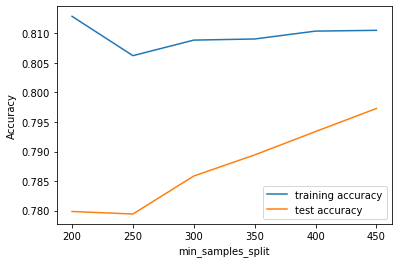

In [357]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [358]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'max_features': [5, 10]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [359]:
# Fit the grid search to the data
grid_search.fit(df_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    7.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 4

In [360]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7925650911514113 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 300, 'min_samples_split': 400}


Here, I am creating new decision tree model based on the hyperparameters from the above plots

In [402]:
dt_tuned = DecisionTreeClassifier(max_depth=7, class_weight='balanced', max_features=14, min_samples_leaf=200, min_samples_split=300)

In [403]:
dt_tuned.fit(df_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [404]:
y_pred = dt_tuned.predict(df_test_pca)

In [405]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8107717934480844


In [406]:
confusion3 = metrics.confusion_matrix(y_test, y_pred)
confusion3

array([[6728, 1492],
       [ 212,  573]], dtype=int64)

In [407]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [408]:
# Let's see the sensitivity of our decision tree model
TP / float(TP+FN)

0.729936305732484

### Model 4: Modelling with Random Forest 

In [180]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [409]:
rf_default = RandomForestClassifier(class_weight='balanced')

In [410]:
# fit
rf_default.fit(df_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [411]:
# Making predictions
predictions = rf_default.predict(df_test_pca)

In [412]:
print(confusion_matrix(y_test,predictions))

[[8113  107]
 [ 616  169]]


In [185]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [413]:
print(accuracy_score(y_test,predictions))

0.9197112715158245


In [414]:
confusion4 = metrics.confusion_matrix(y_test,predictions)
confusion4

array([[8113,  107],
       [ 616,  169]], dtype=int64)

In [415]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [416]:
# Let's see the sensitivity of our random forest model
TP / float(TP+FN)

0.21528662420382166

Let's tune the hyperparameters

In [417]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [418]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.351728,0.012929,0.009992,0.005042,2,{'max_depth': 2},0.824649,0.793719,0.793144,0.781719,...,0.797039,0.014486,4,0.831310,0.807926,0.783258,0.784507,0.794146,0.800229,0.017874
1,0.992063,0.007497,0.015983,0.000488,7,{'max_depth': 7},0.880562,0.876993,0.892883,0.882647,...,0.883145,0.005288,3,0.896109,0.898667,0.898501,0.895704,0.897370,0.897270,0.001206
2,1.335842,0.011092,0.015874,0.000431,12,{'max_depth': 12},0.913157,0.909350,0.921923,0.913830,...,0.914798,0.004122,2,0.957337,0.959003,0.957818,0.953891,0.955319,0.956673,0.001830
3,1.388898,0.027670,0.016229,0.004693,17,{'max_depth': 17},0.921485,0.915061,0.926684,0.926684,...,0.922985,0.004394,1,0.971974,0.972807,0.970669,0.975131,0.973227,0.972762,0.001472


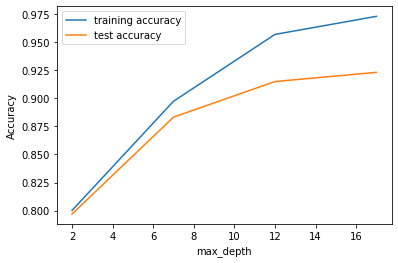

In [419]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [420]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [421]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.289427,0.096889,0.100265,0.007870,100,{'n_estimators': 100},0.867951,0.857483,0.870983,0.864794,...,0.865772,0.004585,4,0.872784,0.872546,0.864112,0.867742,0.872323,0.869901,0.003445
1,31.105021,0.149029,0.470039,0.007107,500,{'n_estimators': 500},0.867714,0.858434,0.872887,0.864556,...,0.866105,0.004702,3,0.877544,0.874628,0.870776,0.867980,0.872144,0.872614,0.003269
2,56.121603,0.217897,0.843097,0.007011,900,{'n_estimators': 900},0.866524,0.859624,0.871459,0.865984,...,0.866200,0.003809,2,0.876354,0.873498,0.869407,0.868455,0.871847,0.871912,0.002845
3,80.820086,0.246460,1.209107,0.005667,1300,{'n_estimators': 1300},0.862955,0.857483,0.871935,0.867889,...,0.866295,0.005430,1,0.875759,0.873676,0.870716,0.870181,0.873453,0.872757,0.002056


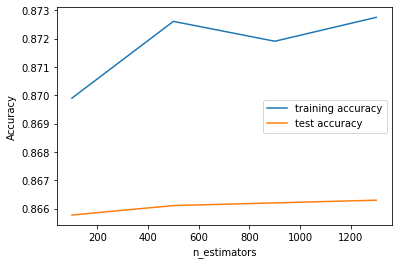

In [422]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [423]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [424]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.531739,0.021646,0.010845,0.005787,4,{'max_features': 4},0.843445,0.829170,0.852654,0.827184,...,0.840021,0.010120,5,0.852612,0.844817,0.852213,0.835495,0.858698,0.848767,0.007963
1,1.010804,0.018447,0.014360,0.001973,8,{'max_features': 8},0.845111,0.827980,0.849798,0.852416,...,0.842306,0.009038,4,0.858146,0.848983,0.845550,0.855842,0.839243,0.849553,0.006871
2,1.644018,0.005560,0.014330,0.001939,14,{'max_features': 14},0.853200,0.821556,0.857177,0.844323,...,0.845162,0.012541,1,0.864037,0.836011,0.849476,0.852868,0.856973,0.851873,0.009298
3,2.322190,0.009164,0.007950,0.006620,20,{'max_features': 20},0.848442,0.822746,0.854320,0.844323,...,0.843972,0.011087,3,0.855468,0.842437,0.847811,0.845788,0.857627,0.849826,0.005791
4,2.775124,0.005776,0.009089,0.006487,24,{'max_features': 24},0.845111,0.847490,0.847179,0.834087,...,0.844067,0.005056,2,0.853445,0.860050,0.841088,0.840314,0.853106,0.849601,0.007681


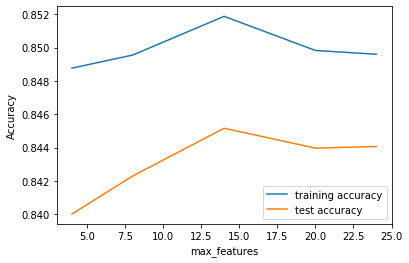

In [425]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [426]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [427]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.008662,0.021334,0.016178,0.002222,100,{'min_samples_leaf': 100},0.870093,0.871520,0.880029,0.872411,...,0.873864,0.003516,1,0.883553,0.887719,0.880533,0.879819,0.882615,0.882848,0.002786
1,0.908806,0.010874,0.014383,0.001712,150,{'min_samples_leaf': 150},0.860576,0.858434,0.872411,0.858843,...,0.862202,0.005186,2,0.871236,0.876711,0.872025,0.867325,0.869229,0.871305,0.003159
2,0.853059,0.020776,0.015705,0.000139,200,{'min_samples_leaf': 200},0.860100,0.843921,0.863842,0.860747,...,0.858727,0.007631,4,0.868618,0.859693,0.862030,0.871728,0.869467,0.866307,0.004621
3,0.801984,0.014783,0.012973,0.006551,250,{'min_samples_leaf': 250},0.853200,0.854628,0.867174,0.853130,...,0.857061,0.005264,5,0.864215,0.866298,0.867087,0.864707,0.863160,0.865094,0.001420
4,0.761937,0.013041,0.012025,0.006229,300,{'min_samples_leaf': 300},0.856531,0.845111,0.852178,0.851464,...,0.852873,0.004789,6,0.867666,0.863918,0.844895,0.854712,0.866373,0.859513,0.008598


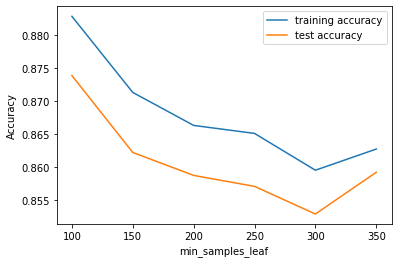

In [428]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [429]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [430]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.238267,0.027839,0.016274,0.000459,200,{'min_samples_split': 200},0.883179,0.871758,0.889550,0.893359,...,0.886382,0.008271,1,0.904141,0.898965,0.899929,0.902903,0.904986,0.902185,0.002352
1,1.201571,0.022844,0.016050,0.000472,250,{'min_samples_split': 250},0.882227,0.870331,0.888360,0.880029,...,0.880908,0.005953,2,0.895395,0.896942,0.895109,0.896240,0.896835,0.896104,0.000741
2,1.159963,0.029586,0.015879,0.002301,300,{'min_samples_split': 300},0.875089,0.863193,0.880267,0.876458,...,0.875910,0.007161,3,0.891229,0.890991,0.880355,0.884698,0.894574,0.888369,0.005124
3,1.111100,0.020162,0.015054,0.001541,350,{'min_samples_split': 350},0.869379,0.869379,0.885503,0.876696,...,0.874863,0.005983,4,0.885160,0.892657,0.885352,0.886245,0.890409,0.887965,0.003021
4,1.078340,0.024931,0.015800,0.000157,400,{'min_samples_split': 400},0.874138,0.867476,0.886456,0.871459,...,0.874768,0.006345,5,0.882304,0.887540,0.887732,0.881426,0.883329,0.884466,0.002658


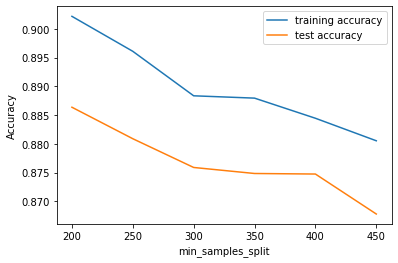

In [431]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Grid Search to Find Optimal Hyperparameters

In [432]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [433]:
# Fit the grid search to the data
grid_search.fit(df_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 12.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [434]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8851920605454805 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


Here, I am creating new random forest model based on the hyperparameters from the above plots

In [450]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=14,
                             n_estimators=200,
                            class_weight='balanced')

In [451]:
# fit
rfc.fit(df_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features=14,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [453]:
# predict
predictions = rfc.predict(df_test_pca)

In [454]:
print(accuracy_score(y_test,predictions))

0.8762909494725153


In [455]:
confusion4 = metrics.confusion_matrix(y_test,predictions)
confusion4

array([[7294,  926],
       [ 188,  597]], dtype=int64)

In [456]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [457]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7605095541401274